In [7]:
import cv2
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [31]:
ROW_SUM_CSV = "anon_blank_blank_00height_amaske-6912_page1r.csv"
CUTS_CSV = "anon_blank_blank_00height_amaske-6912_page1r_lines.csv"

'''
Given the row sums of a document image and a list of segmentation 
positions, return the average of the histograms produced by segmenting
the row sum data at those positions. Assumes the cuts are of equal height.
'''
def mean_histogram(row_sums, cuts):
        height = cuts[0][1] - cuts[0][0]
        average_histogram = np.zeros((height, 1))

        for cut in cuts:
            for i in range(cut[0], cut[1]):
                row = i - cut[0]
                average_histogram[row][0] += row_sums[i][0]

        average_histogram /= len(cuts)
        
        return average_histogram

In [32]:
row_sums = pandas.read_csv(ROW_SUM_CSV).values.tolist()
cuts = pandas.read_csv(CUTS_CSV).values.tolist()

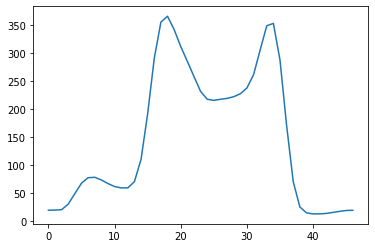

In [33]:
h = mean_histogram(row_sums, cuts)
plt.plot(h)